### 모라벡 알고리즘

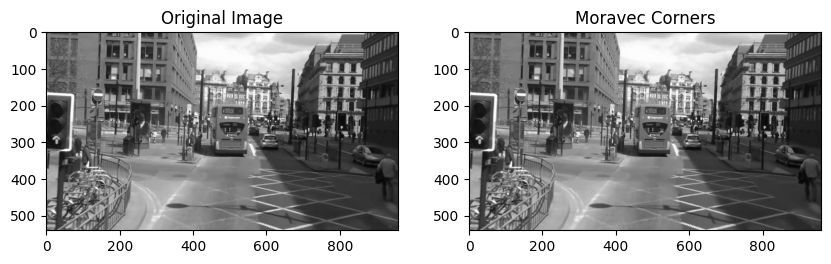

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('mot_color70.jpg', cv.IMREAD_GRAYSCALE)
if img is None:
    raise Exception("이미지를 찾을 수 없습니다!")

window_size = 3
offset = 1  # 윈도우 반경
threshold = 10000

response = np.zeros(img.shape)

directions = [(-1, 0), (1, 0), (0, -1), (0, 1),
              (-1, -1), (-1, 1), (1, -1), (1, 1)]

# 가장 큰 이동 거리까지 여유 확보
margin = offset + 1

for y in range(margin, img.shape[0] - margin):
    for x in range(margin, img.shape[1] - margin):
        min_SSD = float('inf')
        window = img[y - offset:y + offset + 1, x - offset:x + offset + 1]

        for dx, dy in directions:
            shifted_window = img[y - offset + dy:y + offset + 1 + dy,
                                 x - offset + dx:x + offset + 1 + dx]

            # shape 안전성 체크
            if window.shape == shifted_window.shape:
                SSD = np.sum((window - shifted_window) ** 2)
                if SSD < min_SSD:
                    min_SSD = SSD

        response[y, x] = min_SSD

# 코너 응답 맵 임계값
corners = (response > threshold) * 1

# 시각화
img_color = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if corners[y, x]:
            cv.circle(img_color, (x, y), 1, (0, 0, 255), -1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Moravec Corners')
plt.imshow(img_color)
plt.show()


### 해리스 특징점 검출 구현하기

In [ ]:
import cv2 as cv
import numpy as np

img=np.array([[0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,0,0,0],
              [0,0,0,1,1,0,0,0,0,0],
              [0,0,0,1,1,1,0,0,0,0],
              [0,0,0,1,1,1,1,0,0,0],
              [0,0,0,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0]],dtype=np.float32)

ux=np.array([[-1,0,1]])
uy=np.array([-1,0,1]).transpose()

k=cv.getGaussianKernel(3,1)
g=np.outer(k,k.transpose())

# 밝기 변화율
dy=cv.filter2D(img,cv.CV_32F,uy)
dx=cv.filter2D(img,cv.CV_32F,ux)


# 2차 모멘트(구조 텐서)M
dyy=dy*dy
dxx=dx*dx
dyx=dy*dx

gdyy=cv.filter2D(dyy,cv.CV_32F,g)
gdxx=cv.filter2D(dxx,cv.CV_32F,g)
gdyx=cv.filter2D(dyx,cv.CV_32F,g)

# Harris 응답 함수 R
# det(M): 두 방향 변화량의 곱(고유값 곱), trace(M): 두 방향 변화량의 합(고유값 합)
# R이 클수록 모든 반향으로 변화향 큼 -> 코너
C=(gdyy*gdxx-gdyx*gdyx)-0.04*(gdyy+gdxx)*(gdyy+gdxx)

for j in range(1,C.shape[0]-1):		# 비최대 억제
    for i in range(1,C.shape[1]-1):
        if C[j,i]>0.1 and sum(sum(C[j,i]>C[j-1:j+2,i-1:i+2]))==8:
            img[j,i]=9			# 특징점을 원본 영상에 9로 표시
np.set_printoptions(precision=2)

In [14]:
print('dy\n',dy) 
print('dx\n',dx) 

dy
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0. -1. -1. -1. -1.  0.  0.  0.]
 [ 0.  0.  0. -1. -1. -1. -1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
dx
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1. -1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0. -1. -1.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0. -1. -1.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0. -1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [17]:
print('dyy\n',dyy) 
print('dxx\n',dxx) 

dyy
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
dxx
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
print('dyx\n',dyx)

dyx
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1. -1.  0.  0.]
 [ 0.  0.  0. -1. -0. -0. -0. -0. -0.  0.]
 [ 0.  0.  0. -0. -0. -0. -0. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [19]:
print('gdyy\n',gdyy) 
print('gdxx\n',gdxx)

gdyy
 [[0.   0.   0.15 0.25 0.15 0.   0.   0.   0.   0.  ]
 [0.   0.   0.2  0.4  0.32 0.08 0.   0.   0.   0.  ]
 [0.   0.   0.2  0.53 0.6  0.32 0.08 0.   0.   0.  ]
 [0.   0.   0.08 0.32 0.6  0.6  0.32 0.08 0.   0.  ]
 [0.   0.   0.   0.08 0.32 0.6  0.6  0.32 0.08 0.  ]
 [0.   0.   0.08 0.2  0.35 0.6  0.73 0.48 0.12 0.  ]
 [0.   0.   0.2  0.53 0.73 0.8  0.8  0.52 0.15 0.  ]
 [0.   0.   0.2  0.53 0.73 0.73 0.65 0.4  0.12 0.  ]
 [0.   0.   0.08 0.2  0.27 0.27 0.27 0.2  0.08 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
gdxx
 [[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.08 0.12 0.15 0.12 0.08 0.   0.   0.   0.  ]
 [0.   0.2  0.4  0.52 0.48 0.32 0.08 0.   0.   0.  ]
 [0.   0.27 0.65 0.8  0.73 0.6  0.32 0.08 0.   0.  ]
 [0.   0.27 0.73 0.8  0.6  0.6  0.6  0.32 0.08 0.  ]
 [0.   0.27 0.73 0.73 0.35 0.32 0.6  0.6  0.32 0.15]
 [0.   0.2  0.53 0.53 0.2  0.08 0.32 0.53 0.4  0.25]
 [0.   0.08 0.2  0.2  0.08 0.   0.08 0.2  0.2  0.15]
 [0.   0.   0.   0.   0.   0.   0

In [20]:
print('hdyx\n',gdyx) 

hdyx
 [[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.08 -0.12 -0.08  0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.2  -0.4  -0.32 -0.08  0.    0.    0.  ]
 [ 0.    0.    0.   -0.2  -0.53 -0.6  -0.32 -0.08  0.    0.  ]
 [ 0.    0.    0.   -0.08 -0.32 -0.6  -0.6  -0.32 -0.08  0.  ]
 [ 0.    0.   -0.08 -0.12 -0.15 -0.32 -0.53 -0.4  -0.12  0.  ]
 [ 0.    0.   -0.12 -0.2  -0.12 -0.08 -0.2  -0.2  -0.08  0.  ]
 [ 0.    0.   -0.08 -0.12 -0.08  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


In [22]:
print(C)					# 특징 가능성 맵 
print(img)					# 특징점을 9로 표시한 원본 영상 

popping=np.zeros([160,160],np.uint8)	# 화소 확인 가능하게 16배로 확대
for j in range(0,160):
    for i in range(0,160):
        popping[j,i]=np.uint8((C[j//16,i//16]+0.06)*700)  

cv.imshow('Image Display2',popping)    
cv.waitKey()
cv.destroyAllWindows()

[[ 0.    0.   -0.   -0.   -0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.    0.02  0.04  0.02 -0.    0.    0.    0.    0.  ]
 [ 0.   -0.    0.07  0.19  0.08 -0.02 -0.    0.    0.    0.  ]
 [ 0.   -0.    0.03  0.17  0.09 -0.06 -0.02 -0.    0.    0.  ]
 [ 0.   -0.   -0.02  0.02  0.05 -0.06 -0.06 -0.02 -0.    0.  ]
 [ 0.   -0.    0.02  0.09  0.08  0.05  0.09  0.08  0.02 -0.  ]
 [ 0.   -0.    0.07  0.19  0.09  0.02  0.17  0.19  0.04 -0.  ]
 [ 0.   -0.    0.03  0.07  0.02 -0.02  0.03  0.07  0.02 -0.  ]
 [ 0.    0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 9. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 9. 1. 1. 1. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


| 이름                  | 설명                            |
| ------------------- | ------------------------------------ |
| **그라디언트**           | 코너는 방향 밝기 변화가 두 방향 모두 커야함            |
| **2차 모멘트 행렬(M)**    | 방향별 변화량을 모아 한 점에서 얼마나 ‘코너성’이 있는지 나타냄 |
| **Harris 응답 함수(R)** | det(M)-k(trace(M)²) 공식으로 코너 강도 산출    |
| **비최대 억제(NMS)**     | 주변에서 가장 강한 점만 특징점으로 선택               |
| **스무딩(가우시안)**       | 노이즈 방지로 더 안정적 특징 추출                  |